# [seaborn: statistical data visualization](http://seaborn.pydata.org/index.html)
## [Distribution Plots](http://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial): <font style="font-size:16px;color:green;">Visualizing the distribution of a dataset</font>

Hi Guys,<br>
Welcome back to the Seaborn. Let's start with Seaborn's Distribution plots. When dealing with a set of data, often the first thing we want to do is get a sense for how the variables are distributed. <br>
In this lecture, we will learn some useful plotting option that allow us to visualize the distribution of a data set.<br> These **distribution plots includes**: <code>distplot(), jointplot(), pairplot(), rugplot(), kdeplot()</code> etc.

&#9989; Seaborn comes with [built-in data sets](https://github.com/mwaskom/seaborn-data) that can be loaded using its function <code>load_dataset('data_set_name')</code>. We will use various built-in data sets for learning purpose in the seaborn section.  

The official and most common way to import seaborn library is as sns.

In [1]:
import seaborn as sns
%matplotlib inline

The given list of built-in data sets can be obtained using <code>**sns.get_dataset_names()**</code>. <br>
    * ['anscombe', 'attention', 'brain_networks', 'car_crashes', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'planets', 'tips', 'titanic']
Any data set from the list can be loaded using <code>**sns.load_dataset('name')**</code> from the online repository (requires internet). <br>

Let's start our learning journey with a simple built-in data set "tips". The data set, "tips", shows the amount that restaurant staff receive in tips from the customer based on sex, total_bill, day, time etc.

In [ ]:
#print(sns.get_dataset_names())

In [2]:
# Loading data set 
tips = sns.load_dataset('tips')

In [3]:
# Lets get a concise summary of the data set.
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


So, our data have 244 entries and 7 columns. Let's check the head of the data!

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The data has a total_bill along with the amount of tip the customer left for the staff along with some other information such as day, sex, time, size of the group/party etc.

## <code>[distplot()](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)</code>

The most convenient way to take a quick look at a univariate (single variable) distribution in seaborn is the <code>distplot()</code> function.<br> By default, this will draw a **histogram** and fit a **[kernel density estimate (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation)**.<br>
&#9758; Shift+Tab for doc string!

c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

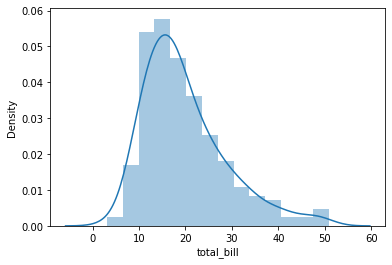

In [8]:
# lets check how the total bill are distributed in the data set
sns.distplot(tips['total_bill'])
# We can add 'tip' distribution on the same plot as well! 
# sns.distplot(tips['tip'])

We will talk about the KED later, don't worry about it at this stage.<br> Let's do the following step at the moment:
* Remove the KDE layer and display the histogram only using kde=False.
* Change the no of bins to 30 *<font style="font-size:12px;color:green;">You need a balance in selecting the bin size, very high value may plot every single instance</font>* 

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

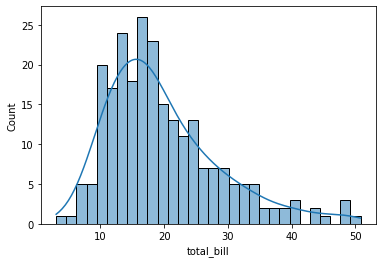

In [19]:
sns.histplot(tips['total_bill'],kde=True, bins=30)
# If you want to display tip col as well
# sns.distplot(tips['tip'],kde=False,bins=30)

Now we only have a histogram, **x: total_bill** and **y: count**. <br>
The data suggest, most of the bills are between 10 and 20 dollars!

## <code>[jointplot()](http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)</code>
We want to do some comparison, how much the customer gave in tip based of their total bill. Seaborn provides a convenient way of plotting bivariate (two variables) data using <code>jointplot()</code>. The function basically match up two distribution plots with our choice of what **kind** (scatter by default) parameter to compare with: 
* kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }

We need to pass in the data set (tips) and tell the function what variables (columns) we want to plot to compare and what is the kind parameter.<br>
Let's try with kind = 'scatter', this is the common plot ans easiest to read. 

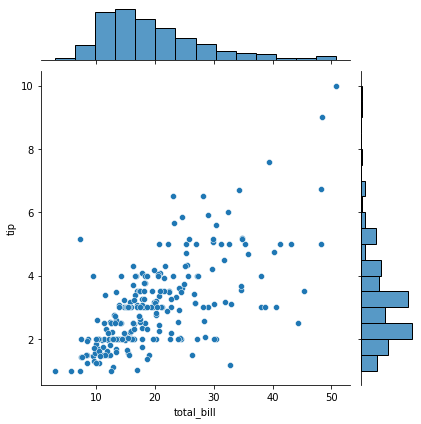

In [20]:
sns.jointplot(x='total_bill',y='tip',data=tips)#kind='scatter' - default

* So, this is essentially just two distribution plots along with a scatter plot having tip on y and total_bill on x axis 
* We can see that most of the tips are less than 4 dollars. The maximum in tip is around 10 dollars.
* We can see some trend in the tips with total_bill as well.
* Looks like, more the customer pay in bill, more he/she gave in the tip.

We will explore this in detail in a while. Let's play with kind parameter first!

**Kind = 'hex'**<br>
Let's pass hex to kind - hexagon distribution representation. This is similar to scatter. <br>
The hexagon more points in it, will be darker in color. <br>
Rather than displaying all points as a scatter plot, the plot is showing the distribution with hexagons and their color for distribution of data points with in the hexagon. 

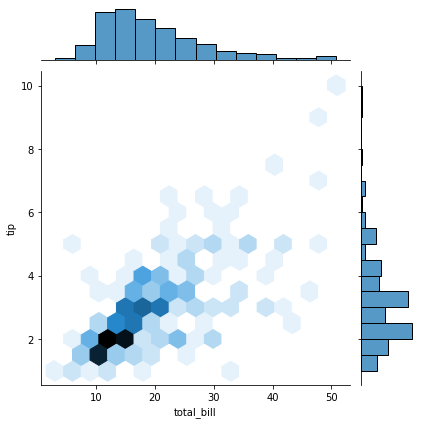

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

Let's try **Kind = 'reg'**<br>
**reg** is for regression. *<font style="font-size:12px;color:green;">We have not learned about linear regression yet, and we will discuss this in details in the machine learning section. We will come back and discuss how the line is built</font>* <br>
With kind = 'reg', the plot is like a scatter plot with a regression line drawn by seaborn. This is just showing almost like a linear fit ti the scattered data points. The plot has pearson coefficient and p-value which we will discuss later on while discussing linear regression. Let's not make things complicated in the data visualization section!  

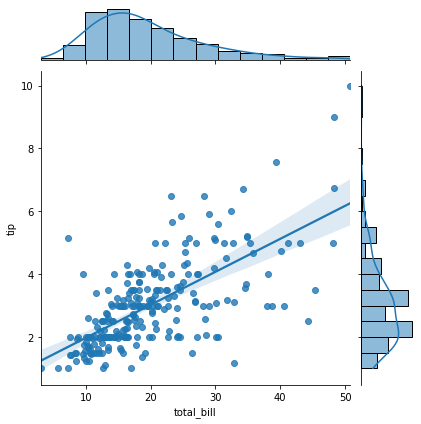

In [22]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

**Lets try kind = 'kde'**<br>
This will give 2D kde plot, showing the darker region with density where most of the data points match up.

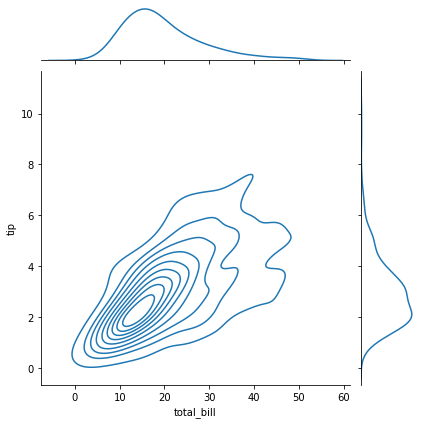

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## <code>[pairplot()](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)</code>
*<font style="font-size:12px;color:green;">We will be using this function often through out the course</font>*<br>
We want to have a quick look on our entire data to see the pairwise relationship. This can be done using seaborn function <code>pairplot()</code>, which plot multiple pairwise bivariate distributions in a dataset. This creates a matrix of axes and shows the relationship for each pair of columns in our data set. <br>
***By default, it also draws the univariate distribution (histogram) of each variable on the diagonal Axes***:

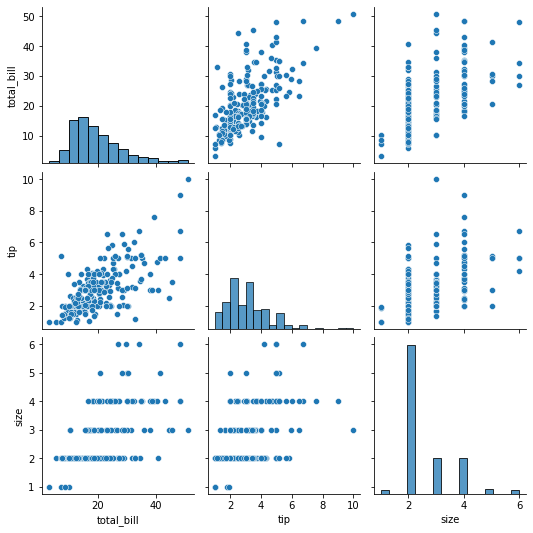

In [24]:
# We need to pass the entire data here
sns.pairplot(tips)

&#9989; Fo the larger dataframes, it takes longer time to plot the pairplot. Our data set 'tips' is relatively small, so we are fine with the time here.<br>
We see, the function plot scatter plots for two variable, e.g. total_bill vs size, tip vs size and when it come to size vs size in the bottom row, the plot is a histogram instead. Same thing for tip vs tip and total_bill vs total_bill along the diagonal. <br>
* Along with plotting pairwise relationships across an entire dataframe (for the numerical columns), <code>pairplot()</code> supports a color **hue argument (for categorical columns)** as well.<br>

For example, we can display information of the categorical column (male and female) **sex** of the customer using **hue** argument as shown below:

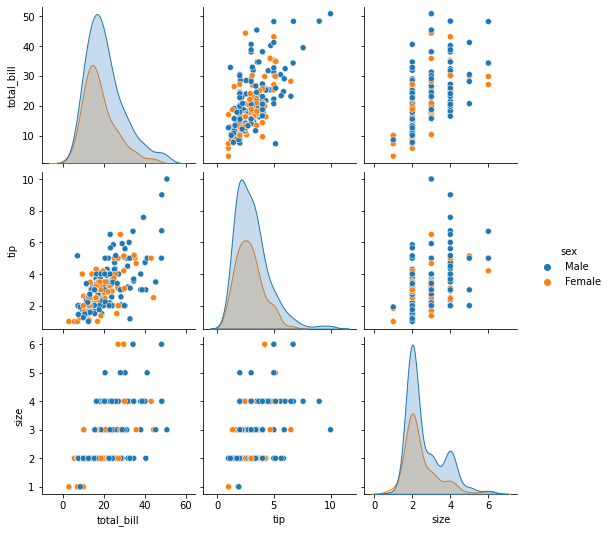

In [25]:
sns.pairplot(tips,hue='sex')#,palette='coolwarm')

We can see that all the green points are Female and all the blue points are Male, based on the legend. We can specify the color palette e.g. "coolwarm" and many others that we will discuss in the style and color section later on.   

## <code>[rugplot()](http://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot)</code>

<code>rugplot()</code> is a very simple concept and just plot sticks on an axis for every data point on a univariate distribution. They are the building block of a KDE plot that we have seen in out earlier plots. <br>
Let's try this function using our data!

In [ ]:
# Let's pass a single col total_bill to the rugplot
sns.rugplot(tips['total_bill'])

What the <code>rugplot()</code> is doing, it is drawing a line/stick for every single point in the passed data column. <br><br>
### <code>rugplot()</code>vs <code>distplot()</code>
Let's put the <code>rugplot()</code> and <code>distplot()</code> for <code>total_bill</code> on the same canvas to get better understanding!

In [ ]:
sns.rugplot(tips['total_bill'],color='r')
sns.distplot(tips['total_bill'], kde=False)

So, the difference between <code>distplot()</code>(histogram) and <code>rugplot()</code> is that the histogram essentially has bins and it counts how many sticks/lines are in that bin and then show it as a number up along the y axis. Actually. the number of all the sticks/lines in rugplot are stacked on each other in distplot for the respective bin <br>
* More lines in the rugplot higher bin in distplot
* Less lines in rugplot smaller bin in distplot.  

## <code>[kdeplot()](http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)</code>

KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. So with our tips dataset:

In [ ]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
sns.distplot(tips['total_bill'])

In [ ]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])
sns.distplot(tips['tip'])

# Good to know -- Optional 
## <code>[Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth) - kdeplot</code>

Let's try to understand kde plots using rugplot. How do we actually build kde line based on rugplot?
 The figure below ([source](https://upload.wikimedia.org/wikipedia/commons/4/41/Comparison_of_1D_histogram_and_KDE.png)) beautifully explains the process. 

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Comparison_of_1D_histogram_and_KDE.png" >
Figure shows the comparison of the histogram (left) and kernel density estimate (right) constructed using the same data. Each of the 6 black dash is the rugplot with 6 individual kernels ([normal Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution)) on top of each black dash, the red dashed curves, and the kernel density estimate the blue curve -- ***The kernels in red dashes are summed to make the kernel density estimate (solid blue curve)***. The data points are the rug plot on the horizontal axis.<br>

KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.<br>

**Let's create a diagram to get batter on kde!**<br>
*Don't worry about understanding the code below, you will not use such codes in you data analysis. This is only to create a diagram (after running the code) for you to understand how the kde plots are calculated. I will go through the steps and explain what the code is doing!*

In [ ]:
# Step 1: Importing couple of libraries to use 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Creating dataset to use
dataset = np.random.randn(20)

# Creating rugplot using dataset
sns.rugplot(dataset);

# Setting up the x-axis for the plot using max and min values in the dataset
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# creating 100 equally spaced points from x_min to x_max using np.linspace()
x_axis = np.linspace(x_min,x_max,100)

# Setting up the bandwidth, follow the wikipedia link for more information:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Creating an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) #shift+tab if you want to know more about the function! 
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [ ]:
# We need to sum the basis functions to get the kde plot.

# Plotting the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plotting figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adding the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Getting rid of y-tick marks
plt.yticks([])

# Setting title
plt.suptitle("Sum of the Basis Functions")

# Great Job!

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br># May want to change the KED section with example on the official website of Seaborn
[Kernel density estimaton](http://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimaton)
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

In [ ]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

In [ ]:
import scipy as spi
density = np.sum(kernels, axis=0)
density /= spi.integrate.trapz(density, support)
plt.plot(support, density);